In [1]:
import pandas as pd
d=pd.read_csv('/content/breast_cancer_survival.csv')
print(d)


     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [2]:
d['Gender'] = d['Gender'].map({'FEMALE': 0, 'MALE': 1})
d['Tumour_Stage'] = d['Tumour_Stage'].map({'I': 1, 'II': 2, 'III': 3})
d['Histology'] = d['Histology'].factorize()[0]
d['ER status'] = d['ER status'].map({'Positive': 1, 'Negative': 0})
d['PR status'] = d['PR status'].map({'Positive': 1, 'Negative': 0})
d['HER2 status'] = d['HER2 status'].map({'Positive': 1, 'Negative': 0})
d['Surgery_type'] = d['Surgery_type'].factorize()[0]
d['Patient_Status'] = d['Patient_Status'].map({'Alive': 1, 'Dead': 0})
d['Date_of_Surgery']=d['Date_of_Surgery'].map({'20-May-18':0,'26-Apr-18':1,'24-Aug-18':2,'16-Nov-18':3,'12-Dec-18':4,'15-Jan-19':5,'25-Jul-18':6,'26-Mar-19':7,'26-Nov-18':8,'04-Feb-19':9})
d['Date_of_Last_Visit']=d['Date_of_Last_Visit'].map({'26-Aug-18':0,'25-Jan-19':1,'08-Apr-20':2,'28-Jul-20':3,'05-Jan-19':4,'27-Mar-20':5,'23-Apr-19':6,'11-Oct-19':7,'05-Dec-18':8,'10-Aug-19':9})
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0            0          1          1        

In [5]:
y=d['Patient_Status']
x=d.drop('Patient_Status',axis=1)
print(y)

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
329    1.0
330    1.0
331    0.0
332    1.0
333    0.0
Name: Patient_Status, Length: 334, dtype: float64


In [6]:
print(x)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0            0          1          1        

In [7]:
x.fillna(x.mean(),inplace=True)

In [8]:
x.isna().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [9]:
y.isna().sum()

13

In [10]:
y.fillna(y.mean(),inplace=True)

In [11]:
y=y.astype(int)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7761194029850746


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
bagging_classifier = BaggingClassifier(
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)
bagging_classifier.base_estimator = DecisionTreeClassifier()
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7611940298507462


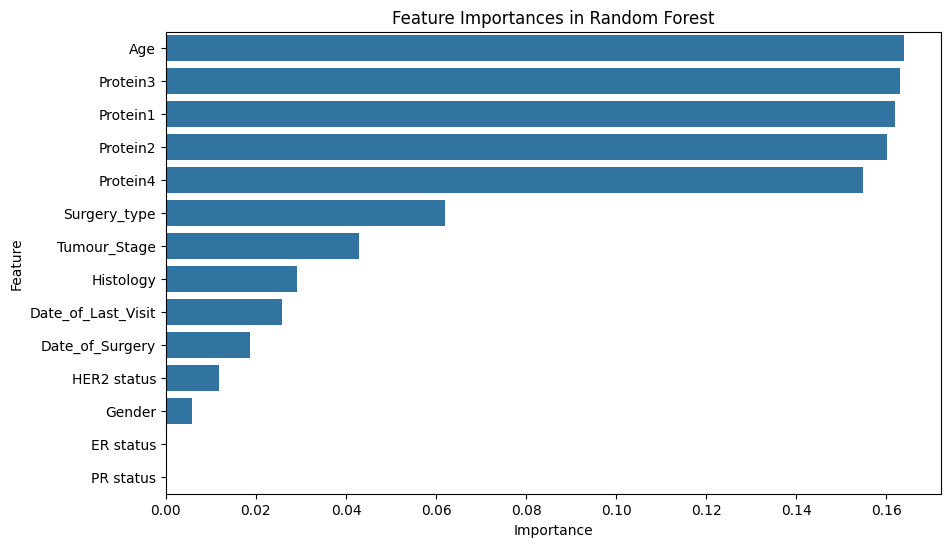

In [16]:
!pip install matplotlib seaborn pandas scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

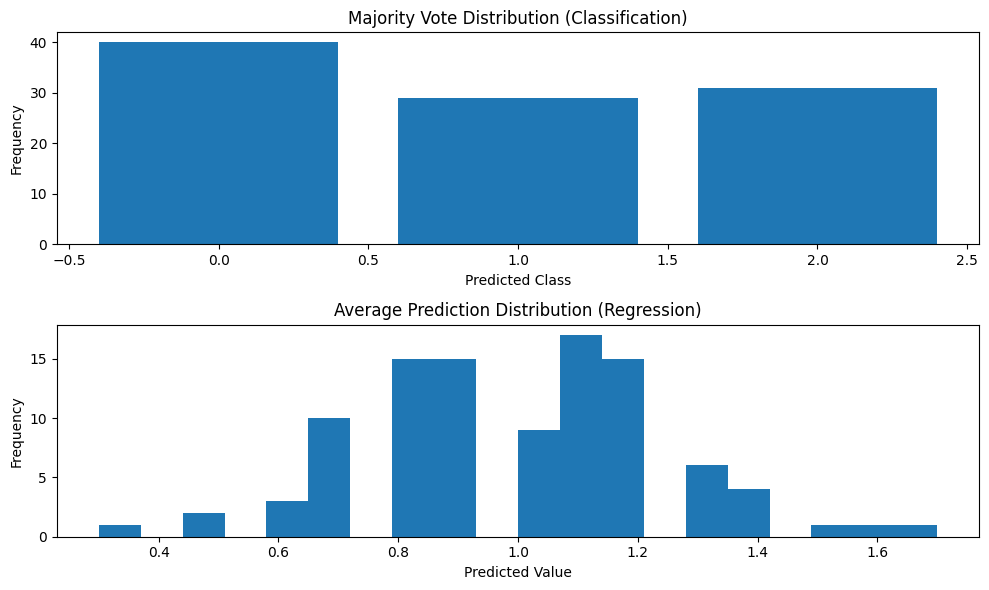

In [17]:
import numpy as np
import matplotlib.pyplot as plt
num_trees = 10
num_classes = 3
tree_predictions = np.random.randint(0, num_classes, size=(num_trees, 100))
majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), 0, tree_predictions)

average_prediction = np.mean(tree_predictions, axis=0)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(majority_vote, bins=np.arange(num_classes + 1) - 0.5, rwidth=0.8)
plt.title('Majority Vote Distribution (Classification)')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(average_prediction, bins=20)
plt.title('Average Prediction Distribution (Regression)')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()